In [2]:
import pandas as pd
import numpy as np


link = "https://sv.wikipedia.org/wiki/Sveriges_demografi"
svedemo = pd.read_html(link, match = "Befolkningsförändringar")[0]


#pd.to_numeric(svedemo["Döda"])
#svedemo.info()
svedemo.head(3)




,Unnamed: 0,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270,168,102,402
1,1901,5 156 000,139 370,82 772,56 598,270,161,110,404
2,1902,5 187 000,137 364,79 722,57 642,265,154,111,395


In [3]:
svedemo = svedemo.rename(dict({"Unnamed: 0" : "År",}), axis = "columns")

In [7]:
link = "https://sv.wikipedia.org/wiki/Sveriges_demografi"
svedemo_old = pd.read_html(link, header=1, skiprows=[12], match = "Vid utgången av år")[0]
svedemo_old

svedemo_old.drop(columns=["Totalt","Promille"], inplace = True)

svedemo_old = svedemo_old.rename(dict({"Vid utgången av år" : "År",}), axis = "columns")



In [20]:
new_sve = svedemo.merge(svedemo_old, on =[ "År","Folkmängd"], how = "outer", indicator = True)
new_sve.head()

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet,_merge
0,1900,5 117 000,138 139,86 146,51 993,270.0,168.0,102.0,402.0,left_only
1,1901,5 156 000,139 370,82 772,56 598,270.0,161.0,110.0,404.0,left_only
2,1902,5 187 000,137 364,79 722,57 642,265.0,154.0,111.0,395.0,left_only
3,1903,5 210 000,133 896,78 610,55 286,257.0,151.0,106.0,382.0,left_only
4,1904,5 241 000,134 952,80 152,54 800,257.0,153.0,105.0,383.0,left_only


ConversionError: Failed to convert value(s) to axis units: array(['5 117 000', '5 156 000', '5 187 000', '5 210 000', '5 241 000',
       '5 278 000', '5 316 000', '5 357 000', '5 404 000', '5 453 000',
       '5 499 000', '5 542 000', '5 583 000', '5 621 000', '5 659 000',
       '5 696 000', '5 735 000', '5 779 000', '5 807 000', '5 830 000',
       '5 876 000', '5 929 000', '5 971 000', '5 997 000', '6 021 000',
       '6 045 000', '6 064 000', '6 081 000', '6 097 000', '6 113 000',
       '6 131 000', '6 152 000', '6 176 000', '6 201 000', '6 222 000',
       '6 242 000', '6 259 000', '6 276 000', '6 297 000', '6 326 000',
       '6 356 000', '6 389 000', '6 432 000', '6 491 000', '6 560 000',
       '6 636 000', '6 719 000', '6 803 000', '6 883 000', '6 956 000',
       '7 014 000', '7 073 000', '7 125 000', '7 171 000', '7 213 000',
       '7 262 000', '7 315 000', '7 364 000', '7 409 000', '7 446 000',
       '7 480 000', '7 520 000', '7 562 000', '7 604 000', '7 661 000',
       '7 734 000', '7 808 000', '7 868 000', '7 914 000', '7 968 000',
       '8 043 000', '8 098 000', '8 122 000', '8 137 000', '8 161 000',
       '8 193 000', '8 222 000', '8 252 000', '8 276 000', '8 294 000',
       '8 310 000', '8 320 000', '8 325 000', '8 329 000', '8 337 000',
       '8 350 000', '8 370 000', '8 398 000', '8 437 000', '8 493 000',
       '8 559 000', '8 617 000', '8 668 000', '8 719 000', '8 781 000',
       '8 831 000', '8 843 000', '8 846 000', '8 851 000', '8 858 000',
       '8 872 000', '8 896 000', '8 925 000', '8 958 000', '8 994 000',
       '9 030 000', '9 081 000', '9 148 000', '9 220 000', '9 299 000',
       '9 378 000', '9 449 000', '9 519 000', '9 644 000', '9 747 000',
       '9 851 000', '9 995 000', '10 120 000', '10 230 000', '10 327 589',
       '10 379 295', '900\xa0000', '1\xa0225\xa0000', '1\xa0485\xa0000',
       '1\xa0350\xa0000', '1\xa0878\xa0000', '2\xa0465\xa0000',
       '4\xa0099\xa0000', '5\xa0140\xa0000', '8\xa0861\xa0000',
       '10\xa0379\xa0000'], dtype=object)

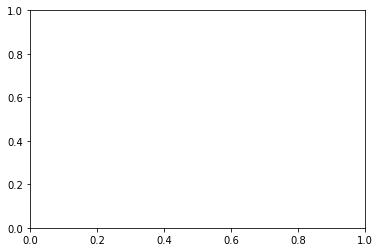

In [25]:
import matplotlib.pyplot as plt

clean_sve = new_sve.drop(columns=["Födda",	"Döda",	"Befolkningsförändringar",	"Nativiteten (per 1000)",	"Dödstalen (per 1000)",	"Befolkningsförändringar (per 1000)",	"Total fertilitet",	"_merge"])
clean_sve.dropna()
